# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
try:
    from CS270Boi.discussion270 import Discussion
except:
    !pip install -U -q CS270Boi
    from CS270Boi.discussion270 import Discussion

C:\Users\hende\AppData\Local\Temp\ipykernel_20128\1745216034.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.0 (0%) Set `net_id` to Your NetID

In [2]:
# This should match your BYU email.
# For example, if my BYU email were jake270@byu.edu, I would set net_id to "jake270"

net_id = "joshhend"

# --------------------_Make sure to run all of the cells before continuing_--------------------
### The discussions and text box are loaded in by running the cell associated with the discussion.
### If you experience any problems/errors with the discussions, please send Jake Cahoon (TA) a message on Discord :)

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
headers = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
df = pd.read_csv("glass.csv", header=None, names=headers)
df = df.drop('ID', axis=1)

In [ ]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled[df.columns[-1]] = df[df.columns[-1]]
df_scaled

In [28]:
# Learn the glass data
target_col = 'Class'
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(target_col, axis=1), df_scaled[target_col], test_size=0.2)

# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Train Accuracy: ", knn.score(X_train, y_train))
print("Test Accuracy: ", knn.score(X_test, y_test))
print("Probabilites: ", knn.predict_proba(X_test))


Train Accuracy:  0.7192982456140351
Test Accuracy:  0.7674418604651163
Probabilites:  [[0.  1.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [0.  0.  0.  0.6 0.2 0.2]
 [0.2 0.2 0.6 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.4 0.4 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.2 0.2 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.2 0.6 0.2 0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.4 0.4 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.  0.6 0.  0.  0.4 0

num | train accuracy | test accuracy
--- | --- | ---
1 | 0.766 | 0.581
2 | 0.760 | 0.581
3 | 0.754 | 0.698
-- | -- | --
avg | 0.760 | 0.620

In [33]:
p_values = [1, 1.5, 2, 2.5, 3, 3.5, 4]
print("| p | Train Accuracy | Test Accuracy |")
print("|---|----------------|---------------|")
for p in p_values:
    knn = KNeighborsClassifier(p=p)
    knn.fit(X_train, y_train)
    print(f"| {p} | {knn.score(X_train, y_train):.3f} | {knn.score(X_test, y_test):.3f} |")

| p | Train Accuracy | Test Accuracy |
|---|----------------|---------------|
| 1 | 0.725 | 0.837 |
| 1.5 | 0.708 | 0.791 |
| 2 | 0.719 | 0.767 |
| 2.5 | 0.731 | 0.767 |
| 3 | 0.737 | 0.767 |
| 3.5 | 0.725 | 0.744 |
| 4 | 0.719 | 0.721 |


| p | Train Accuracy | Test Accuracy |
|---|----------------|---------------|
| 1 | 0.725 | 0.837 |
| 1.5 | 0.708 | 0.791 |
| 2 | 0.719 | 0.767 |
| 2.5 | 0.731 | 0.767 |
| 3 | 0.737 | 0.767 |
| 3.5 | 0.725 | 0.744 |
| 4 | 0.719 | 0.721 |

In [ ]:
# @title 1.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "1.1KNN"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

I loaded in the glass dataset, dropped the ID column (since it has unique values for each row), and normalized the rest of the features. Then I split the data into train and test sets, and ran the model on three random splits to get an average accuracy. With the default values, the train and test accuracy was a little bit better than random, but not by much. I also printed out the probabilites one time, and the voting method was clear. Each probability is a multiple of 0.2, so each closest neighbor gave 0.2 votes, and the highest one won. I then experimented with different p values. The p value didn't seem to effect the training set much, with accuracies bouncing between 0.708 and 0.737, but the testing set accurcy did consistently decrease as the p value increased. This suggests that for this dataset, a lower p value leads to better generalization.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [44]:
# Learn magic telescope data
telescope_arff = arff.loadarff('MagicTelescope.arff')
telescope_df = pd.DataFrame(telescope_arff[0])
telescope_df.columns = telescope_df.columns.str.removesuffix(":")
telescope_df['class'] = telescope_df['class'].str.decode('utf-8')
telescope_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [45]:
X_train, X_test, y_train, y_test = train_test_split(telescope_df.drop('class', axis=1), telescope_df['class'], test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print("Train Accuracy: ", knn.score(X_train, y_train))
print("Test Accuracy: ", knn.score(X_test, y_test))

Train Accuracy:  0.8849894847528917
Test Accuracy:  0.7981072555205048


In [47]:
# @title 2.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.1KNN"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

I loaded in the dataset and split it up into train and test sets. I set up a standard knn classifier with k=3. The train accuracy is not bad at 88.5%, while the testing accuracy is a little worse at 79.8%.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [48]:
# Train/Predict with normalization
scaler = MinMaxScaler()
telescope_df_scaled = pd.DataFrame(scaler.fit_transform(telescope_df.iloc[:, :-1]), columns=telescope_df.columns[:-1])
telescope_df_scaled[telescope_df.columns[-1]] = telescope_df[telescope_df.columns[-1]]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(telescope_df_scaled.drop('class', axis=1), telescope_df_scaled['class'], test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print("Train Accuracy: ", knn.score(X_train, y_train))
print("Test Accuracy: ", knn.score(X_test, y_test))

Train Accuracy:  0.9010252365930599
Test Accuracy:  0.8330704521556257


In [50]:
# @title 2.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.2KNN"
questions = ["Discuss the results of using normalized data vs. unnormalized data.", "Why is it a good idea to normalize data before using KNN?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss the results of using normalized data vs. unnormalized data.**

The training and test set accuracy were better with the normalized data than with the unnormalized data. The test accuracy had about a 3% increase from 79.8% to 83.3%. 

**Why is it a good idea to normalize data before using KNN?**

It's a good idea to normalize data before using KNN because KNN measures distances between datapoints. With unnormalized data, distances may seem larger or smaller for some feature than others, but with normalized data, the distances will be more consitent, so each feature will get the same weight when measuring distance.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [55]:
#Train/Precdict with normalization and distance weighting
X_test, X_train, y_test, y_train = train_test_split(telescope_df_scaled.drop('class', axis=1), telescope_df_scaled['class'], test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)

print("Train Accuracy: ", knn.score(X_train, y_train))
print("Test Accuracy: ", knn.score(X_test, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.8139458464773922


In [56]:
# @title 2.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.3KNN"
questions = ["How did the results change when you used distance weighting?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**How did the results change when you used distance weighting?**

With distance weighting, the training accuracy got up to 100%, but the testing accuracy decreased a little to 81.4%. I didn't expect the testing accuracy to decrease because I thought the distance weighting would increase the generalizability, but in this case, the test accuracy decreased. 

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

In [57]:
# Calculate and Graph classification accuracy vs k values
X_test, X_train, y_test, y_train = train_test_split(telescope_df_scaled.drop('class', axis=1), telescope_df_scaled['class'], test_size=0.2, random_state=7)

k_values = range(1, 16)
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    test_accuracy.append(knn.score(X_test, y_test))

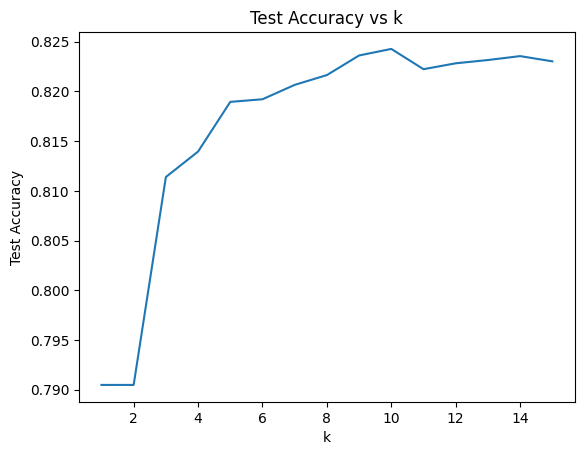

In [58]:
# plot
plt.plot(k_values, test_accuracy)
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs k')
plt.show()

In [ ]:
# @title 2.4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.4KNN"
questions = ["Which is the best k value for the `magic_telescope` dataset?", "Interpret/describe your graph."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Which is the best k value for the `magic_telescope` dataset?**

According to the graph, k=10 seems to produce the best generalizing model. It's test accuracy was the biggest, with accuracy increasing as k approached 10, and decreasing as k surpassed 10. 

**Interpret/describe your graph.**

When only looking at the 1 or 2 closest neighbors (k=1, k=2), the test accuracy is fairly low at 79%. At k=3, there is a large jump up of over 10% to ~81.2% accuracy. After that, the accuracy continues to increase until k=10, where the test accuracy is the highest at around 82.4%. After k=10, the accuracy decreases, slightly increases again, and then decreases again at k=15. This suggests that the model needs a significant amount of weighted votes in order to get a good accuracy. Since the model uses distance weighting, it can effectively use large numbers of k. If it was not weighted, the accuracy probably would not have increased for so long.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

In [ ]:
# @title 3.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.1KNN"
questions = ["Which feature is innapropriate and why?"]
Discussion(discussion_id, questions, net_id); pass

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [ ]:
# Learn and experiment with housing price prediction data

In [ ]:
# @title 3.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.2KNN"
questions = ["Discuss your results.", "Which method was the best?"]
Discussion(discussion_id, questions, net_id); pass

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

In [ ]:
# Learn and graph for different k values

In [ ]:
# @title 3.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.3KNN"
questions = ["Which is the best k value for the `housing` dataset?", "Interpret/describe your graph."]
Discussion(discussion_id, questions, net_id); pass

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [ ]:
# Train/Predict lymph with your own distance metric

In [ ]:
# @title 4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "4KNN"
questions = ["Explain your distance metric.", "Discuss the results of using your own distance metric."]
Discussion(discussion_id, questions, net_id); pass

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

In [ ]:
# @title 5 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "5KNN"
questions = ["Discuss what you learned from implementing a KNN from scratch."]
Discussion(discussion_id, questions, net_id); pass

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0